## Differences between Seeded and Unseeded Region Growing
In seeded region growing the pixels of one region are always connected. In unseeded region growing,
pixels which are assigned to the same region, but are not connected can appear.
This leads to differences in the region merging process. While region merging by intensity distance
leads to good results for seeded region growing, for unseeded region growing pixels of the cell nucleus
are easily merged to the background. Because of that, a small threshold needs to be chosen for region
merging by intensity distance. Region merging by size leads to better results.

A problem we faced when performing region merging on results of the unseeded region merging were
the unconnected pixels, which where assigned to a large region. Therefore, they were not
merged to their neighbors, because the overall size of the region was above the threshold.
This resulted in spots, which resembled salt and pepper noise. In order to improve our result,
we used a median filter with a 3x3 sized filter mask. This improved our dice score.


In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import skimage.io as sk
import matplotlib.pyplot as plt
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import old_seeded_region_growing as old_srg
from Functions import old_unseeded_region_growing as old_urg
from Functions import dice_score as ds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


14
14
0.9092292038840971
0.967490907699285


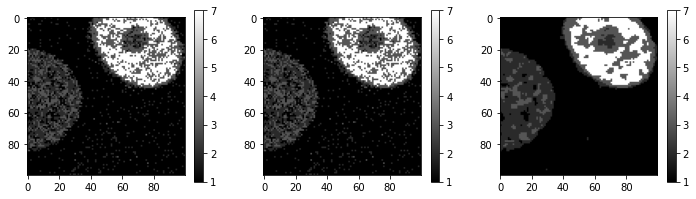

In [19]:
# Bilder nebeneinander: unseeded region growing, merging, median filter

image_intensity = sk.imread("Data/N2DH-GOWT1/img/t01.tif")
image_intensity_small = image_intensity[300:400, 400:500]
image_urg = sk.imread("Result_Pictures/Unseeded_Region_Growing/N2DH-GOWT1/urg_t01.tif")
image_urg_small = image_urg[300:400, 400:500]
image_ground_truth = sk.imread("Data/N2DH-GOWT1/gt/man_seg01.tif")
image_ground_truth_small = image_ground_truth[300:400, 400:500]

image_merged_small = rm.region_merging(image_urg_small, image_intensity_small, 0.001, 1000)
score_merged = ds.evaluate_accuracy_weighted(image_merged_small, image_ground_truth_small)

image_merged_filtered_small = ip.median_filter(image_merged_small, 3)
score_filtered = ds.evaluate_accuracy_weighted(image_merged_filtered_small, image_ground_truth_small)

print(score_merged)
print(score_filtered)

ip.show_three_images_colorbar(image_urg_small, image_merged_small, image_merged_filtered_small, 0.45)



### Bei Comparison of Seeded and Unseeded Region Growing:
If many seeds are used in the seeded region growing, less pixel have to be assigned
during the algorithm which leads to a faster result. In the unseeded region growing
all pixels except the start pixel have to be assigned using the algorithm, which
takes more time.


